In [2]:
import pandas as pd
file = pd.read_csv('insurance.csv')

print(file.info())
print(file.shape)

file.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data check and clean

In [3]:
file.duplicated().any()
file =file.drop_duplicates()

In [4]:
file.sample(5)

,age,sex,bmi,children,smoker,region,charges
1209,59,male,37.10,1,no,southwest,12347.17200
420,64,male,33.88,0,yes,southeast,46889.26120
869,25,female,24.30,3,no,southwest,4391.65200
490,19,female,32.90,0,no,southwest,1748.77400
1331,23,female,33.40,0,no,southwest,10795.93733


In [5]:
file =file.drop_duplicates().reset_index()
file.shape

(1337, 8)

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>]],
      dtype=object)

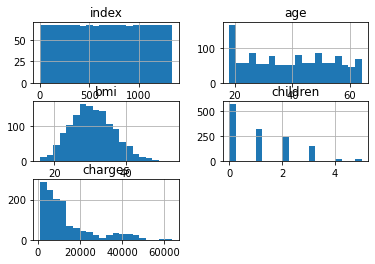

In [6]:
file.hist(bins=20)

# Category - For information only:

In [7]:
file['user_ID'] = pd.DataFrame(file.index).astype(int)
file = file[['user_ID', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
file

# file_feat_transp_count = pd.DataFrame(file_feat_transp[file_feat_transp[col]].sum())

,user_ID,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1332,50,male,30.970,3,no,northwest,10600.54830
1333,1333,18,female,31.920,0,no,northeast,2205.98080
1334,1334,18,female,36.850,0,no,southeast,1629.83350
1335,1335,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df_user = (
    file[['user_ID', 'charges']]
    .groupby('user_ID')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_user['cumsum'] = df_user['total_charges'].cumsum()
value_80proc = int(df_user['total_charges'].sum()*0.8)
df_user['top_user'] = df_user['cumsum'] > value_80proc

top_user = set(df_user[df_user['top_user']]['user_ID'])
len(top_user)/file['user_ID'].nunique()

0.5205684367988033

In [9]:
df_user

,user_ID,total_charges,cumsum,top_user
543,543,63770.42801,6.377043e+04,False
1299,1299,62592.87309,1.263633e+05,False
1229,1229,60021.39897,1.863847e+05,False
577,577,58571.07448,2.449558e+05,False
818,818,55135.40209,3.000912e+05,False
...,...,...,...,...
22,22,1137.01100,1.774966e+07,True
662,662,1136.39940,1.775080e+07,True
1243,1243,1135.94070,1.775193e+07,True
807,807,1131.50660,1.775306e+07,True


In [10]:
df_user_worst = (
    file[['user_ID', 'charges']]
    .groupby('user_ID')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_user_worst['cumsum'] = df_user_worst['total_charges'].cumsum()
value_80proc = int(df_user_worst['total_charges'].sum()*0.8)
df_user_worst['undesirable_user'] = df_user_worst['cumsum'] < value_80proc


In [11]:
df_user_worst=df_user_worst[['user_ID', 'undesirable_user']]
df_user_worst = df_user_worst.merge(file, on='user_ID')
df_user_worst = df_user_worst[df_user_worst['undesirable_user'] ==True]
df_user_worst

,user_ID,undesirable_user,age,sex,bmi,children,smoker,region,charges
0,543,True,54,female,47.410,0,yes,southeast,63770.42801
1,1299,True,45,male,30.360,0,yes,southeast,62592.87309
2,1229,True,52,male,34.485,3,yes,northwest,60021.39897
3,577,True,31,female,38.095,1,yes,northeast,58571.07448
4,818,True,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...,...,...
636,682,True,53,male,24.320,0,no,northwest,9863.47180
637,527,True,51,female,25.800,1,no,southwest,9861.02500
638,279,True,51,female,21.560,1,no,southeast,9855.13140
639,1027,True,54,male,31.600,0,no,southwest,9850.43200


In [12]:
df_user = df_user[['user_ID', 'top_user']]
file = file.merge(df_user, on='user_ID')
file =file[file['top_user'] ==True]
file

,user_ID,age,sex,bmi,children,smoker,region,charges,top_user
1,1,18,male,33.77,1,no,southeast,1725.5523,True
2,2,28,male,33.00,3,no,southeast,4449.4620,True
4,4,32,male,28.88,0,no,northwest,3866.8552,True
5,5,31,female,25.74,0,no,southeast,3756.6216,True
6,6,46,female,33.44,1,no,southeast,8240.5896,True
...,...,...,...,...,...,...,...,...,...
1325,1325,42,female,32.87,0,no,northeast,7050.0213,True
1326,1326,51,male,30.03,1,no,southeast,9377.9047,True
1333,1333,18,female,31.92,0,no,northeast,2205.9808,True
1334,1334,18,female,36.85,0,no,southeast,1629.8335,True


In [13]:
df_children = (
    file[['children', 'charges']]
    .groupby('children')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_children['cumsum'] = df_children['total_charges'].cumsum()
value_80proc = int(df_children['total_charges'].sum()*0.8)
df_children['top_children'] = df_children['cumsum'] > value_80proc

top_children = set(df_children[df_children['top_children']]['children'])
df_children = df_children[['children', 'top_children']]

In [14]:
len(top_children)/file['children'].nunique()

0.6666666666666666

In [15]:
df_children

,children,top_children
1,1,False
0,0,False
2,2,True
3,3,True
5,5,True
4,4,True


In [16]:
df_smoker = (
    file[['smoker', 'charges']]
    .groupby('smoker')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_smoker['cumsum'] = df_smoker['total_charges'].cumsum()
value_80proc = int(df_smoker['total_charges'].sum()*0.8)
df_smoker['top_smoker'] = df_smoker['cumsum'] > value_80proc

top_smoker= set(df_smoker[df_smoker['top_smoker']]['smoker'])
df_smoker = df_smoker[['smoker', 'top_smoker']]

In [17]:
len(top_smoker)/file['smoker'].nunique()

1.0

In [18]:
df_age = (
    file[['age', 'charges']]
    .groupby('age')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_age['cumsum'] = df_age['total_charges'].cumsum()
value_80proc = int(df_age['total_charges'].sum()*0.8)
df_age['top_age'] = df_age['cumsum'] > value_80proc

top_age= set(df_age[df_age['top_age']]['age'])
df_age[['age', 'top_age']].groupby(by='top_age').describe()
df_age = df_age[['age', 'top_age']]

In [19]:
len(top_age)/file['age'].nunique()

0.3611111111111111

In [20]:
df_sex = (
    file[['sex', 'charges']]
    .groupby('sex')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_sex['cumsum'] = df_sex['total_charges'].cumsum()
value_80proc = int(df_sex['total_charges'].sum()*0.8)
df_sex['top_sex'] = df_sex['cumsum'] > value_80proc

top_sex= set(df_sex[df_sex['top_sex']]['sex'])
df_sex = df_sex[['sex', 'top_sex']]

In [21]:
len(top_sex)/file['sex'].nunique()

0.5

In [22]:
df_bmi = (
    file[['bmi', 'charges']]
    .groupby('bmi')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_bmi['cumsum'] = df_bmi['total_charges'].cumsum()
value_80proc = int(df_bmi['total_charges'].sum()*0.8)
df_bmi['top_bmi'] = df_bmi['cumsum'] > value_80proc

top_bmi= set(df_bmi[df_bmi['top_bmi']]['bmi'])
df_bmi[['bmi', 'top_bmi']].groupby(by='top_bmi').describe()
df_bmi = df_bmi[['bmi', 'top_bmi']]

In [23]:
len(top_bmi)/file['bmi'].nunique()

0.44862155388471175

In [24]:
df_region = (
    file[['region', 'charges']]
    .groupby('region')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_region['cumsum'] = df_region['total_charges'].cumsum()
value_80proc = int(df_region['total_charges'].sum()*0.8)
df_region['top_region'] = df_region['cumsum'] > value_80proc

top_region= set(df_region[df_region['top_region']]['region'])
df_region = df_region[['region', 'top_region']]

In [25]:
len(top_region)/file['region'].nunique()

0.25

In [26]:
file = file.merge(df_region, on='region')
file = file.merge(df_children, on='children')
file = file.merge(df_smoker, on='smoker')
file = file.merge(df_age, on='age')
file = file.merge(df_sex, on='sex')
file = file.merge(df_bmi, on='bmi')
file


,user_ID,age,sex,bmi,children,smoker,region,charges,top_user,top_region,top_children,top_smoker,top_age,top_sex,top_bmi
0,1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False,True,True
1,1096,22,male,33.770,0,no,southeast,1674.63230,True,False,False,True,True,True,True
2,270,18,male,29.370,1,no,southeast,1719.43630,True,False,False,True,False,True,False
3,609,47,female,29.370,1,no,southeast,8547.69130,True,False,False,True,False,False,False
4,709,18,male,35.200,1,no,southeast,1727.54000,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,81,45,female,38.285,0,no,northeast,7935.29115,True,True,False,True,False,False,False
692,445,45,female,33.100,0,no,southwest,7345.08400,True,False,False,True,False,False,False
693,652,45,female,36.300,2,no,southeast,8527.53200,True,False,True,True,False,False,False
694,1233,45,female,27.830,2,no,southeast,8515.75870,True,False,True,True,False,False,False


In [27]:
file_feat = file[['top_region', 'top_children', 'top_smoker', 'top_age', 'top_sex', 'top_bmi']]
file_feat

,top_region,top_children,top_smoker,top_age,top_sex,top_bmi
0,False,False,True,False,True,True
1,False,False,True,True,True,True
2,False,False,True,False,True,False
3,False,False,True,False,False,False
4,False,False,True,False,True,False
...,...,...,...,...,...,...
691,True,False,True,False,False,False
692,False,False,True,False,False,False
693,False,True,True,False,False,False
694,False,True,True,False,False,False


In [28]:
file_feat_transp =file_feat.transpose()
file_feat_transp.sum()



file_feat_transp_count =pd.DataFrame(file_feat_transp.sum())
file_feat_transp_count

file_feat_transp_count['user_ID'] = file['user_ID']
file_feat_transp_count
  

,0,user_ID
0,3,1
1,4,1096
2,2,270
3,1,609
4,2,709
...,...,...
691,2,81
692,1,445
693,2,652
694,2,1233


In [29]:
file = file.merge(file_feat_transp_count, on='user_ID', how='left')
file.head()
file.rename(columns={0 :'sum_top'}, inplace=True)
file

,user_ID,age,sex,bmi,children,smoker,region,charges,top_user,top_region,top_children,top_smoker,top_age,top_sex,top_bmi,sum_top
0,1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False,True,True,3
1,1096,22,male,33.770,0,no,southeast,1674.63230,True,False,False,True,True,True,True,4
2,270,18,male,29.370,1,no,southeast,1719.43630,True,False,False,True,False,True,False,2
3,609,47,female,29.370,1,no,southeast,8547.69130,True,False,False,True,False,False,False,1
4,709,18,male,35.200,1,no,southeast,1727.54000,True,False,False,True,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,81,45,female,38.285,0,no,northeast,7935.29115,True,True,False,True,False,False,False,2
692,445,45,female,33.100,0,no,southwest,7345.08400,True,False,False,True,False,False,False,1
693,652,45,female,36.300,2,no,southeast,8527.53200,True,False,True,True,False,False,False,2
694,1233,45,female,27.830,2,no,southeast,8515.75870,True,False,True,True,False,False,False,2


In [30]:
file['sum_top'] = file['sum_top'].replace(6,1)
file['sum_top'] = file['sum_top'].replace(5,2)
file['sum_top'] = file['sum_top'].replace(4,3)
file['sum_top'] = file['sum_top'].replace(3,4)
file['sum_top'] = file['sum_top'].replace(2,5)
file['sum_top'] = file['sum_top'].replace(1,6)
file['sum_top'] = file['sum_top'].replace(0,7)
file

,user_ID,age,sex,bmi,children,smoker,region,charges,top_user,top_region,top_children,top_smoker,top_age,top_sex,top_bmi,sum_top
0,1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False,True,True,4
1,1096,22,male,33.770,0,no,southeast,1674.63230,True,False,False,True,True,True,True,4
2,270,18,male,29.370,1,no,southeast,1719.43630,True,False,False,True,False,True,False,5
3,609,47,female,29.370,1,no,southeast,8547.69130,True,False,False,True,False,False,False,6
4,709,18,male,35.200,1,no,southeast,1727.54000,True,False,False,True,False,True,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,81,45,female,38.285,0,no,northeast,7935.29115,True,True,False,True,False,False,False,5
692,445,45,female,33.100,0,no,southwest,7345.08400,True,False,False,True,False,False,False,6
693,652,45,female,36.300,2,no,southeast,8527.53200,True,False,True,True,False,False,False,5
694,1233,45,female,27.830,2,no,southeast,8515.75870,True,False,True,True,False,False,False,5


In [31]:
file.rename(columns={'sum_top' :'category'}, inplace=True)
file = file[['user_ID','age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'category']]
file['category'].value_counts()

4    359
5    251
6     86
Name: category, dtype: int64

In [32]:
file['category'] = file['category'].replace(4,1)
file['category'] = file['category'].replace(5,2)
file['category'] = file['category'].replace(6,3)
file.sample(5)

C:\Users\andrz\AppData\Local\Temp/ipykernel_12792/3170669020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['category'] = file['category'].replace(4,1)
C:\Users\andrz\AppData\Local\Temp/ipykernel_12792/3170669020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['category'] = file['category'].replace(5,2)
C:\Users\andrz\AppData\Local\Temp/ipykernel_12792/3170669020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,user_ID,age,sex,bmi,children,smoker,region,charges,category
74,204,46,male,22.300,0,no,southwest,7147.10500,2
57,937,18,male,26.180,2,no,southeast,2304.00220,1
644,698,23,female,39.270,2,no,southeast,3500.61230,1
537,594,46,female,33.725,1,no,northeast,8823.98575,2
634,1189,31,female,32.775,2,no,northwest,5327.40025,1


In [33]:
df_user_worst['category'] = 4
df_user_worst = df_user_worst[['user_ID', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'category']]
df_user_worst


,user_ID,age,sex,bmi,children,smoker,region,charges,category
0,543,54,female,47.410,0,yes,southeast,63770.42801,4
1,1299,45,male,30.360,0,yes,southeast,62592.87309,4
2,1229,52,male,34.485,3,yes,northwest,60021.39897,4
3,577,31,female,38.095,1,yes,northeast,58571.07448,4
4,818,33,female,35.530,0,yes,northwest,55135.40209,4
...,...,...,...,...,...,...,...,...,...
636,682,53,male,24.320,0,no,northwest,9863.47180,4
637,527,51,female,25.800,1,no,southwest,9861.02500,4
638,279,51,female,21.560,1,no,southeast,9855.13140,4
639,1027,54,male,31.600,0,no,southwest,9850.43200,4


In [34]:
file = pd.concat([file, df_user_worst])
file

,user_ID,age,sex,bmi,children,smoker,region,charges,category
0,1,18,male,33.77,1,no,southeast,1725.5523,1
1,1096,22,male,33.77,0,no,southeast,1674.6323,1
2,270,18,male,29.37,1,no,southeast,1719.4363,2
3,609,47,female,29.37,1,no,southeast,8547.6913,3
4,709,18,male,35.20,1,no,southeast,1727.5400,2
...,...,...,...,...,...,...,...,...,...
636,682,53,male,24.32,0,no,northwest,9863.4718,4
637,527,51,female,25.80,1,no,southwest,9861.0250,4
638,279,51,female,21.56,1,no,southeast,9855.1314,4
639,1027,54,male,31.60,0,no,southwest,9850.4320,4


In [35]:
# pd.get_dummies(file[['sex', 'smoker', 'region']])
file_dummies = pd.get_dummies(file[['sex', 'smoker', 'region']])
file_dummies['user_ID'] = file['user_ID']
file_dummies

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,user_ID
0,0,1,1,0,0,0,1,0,1
1,0,1,1,0,0,0,1,0,1096
2,0,1,1,0,0,0,1,0,270
3,1,0,1,0,0,0,1,0,609
4,0,1,1,0,0,0,1,0,709
...,...,...,...,...,...,...,...,...,...
636,0,1,1,0,0,1,0,0,682
637,1,0,1,0,0,0,0,1,527
638,1,0,1,0,0,0,1,0,279
639,0,1,1,0,0,0,0,1,1027


In [36]:
file = file.merge(file_dummies, on='user_ID')
file = file[['user_ID', 'age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges', 'category']]
file = file.sort_values(by='user_ID')
file = file[['age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_no', 'smoker_yes','region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges', 'category']]
file

,age,sex_female,sex_male,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,category
1027,19,1,0,27.900,0,0,1,0,0,0,1,16884.92400,4
0,18,0,1,33.770,1,1,0,0,0,1,0,1725.55230,1
123,28,0,1,33.000,3,1,0,0,0,1,0,4449.46200,1
935,33,0,1,22.705,0,1,0,0,1,0,0,21984.47061,4
245,32,0,1,28.880,0,1,0,0,1,0,0,3866.85520,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,50,0,1,30.970,3,1,0,0,1,0,0,10600.54830,4
526,18,1,0,31.920,0,1,0,1,0,0,0,2205.98080,2
473,18,1,0,36.850,0,1,0,0,0,1,0,1629.83350,3
507,21,1,0,25.800,0,1,0,0,0,0,1,2007.94500,2


# Correlation + Future engineering:

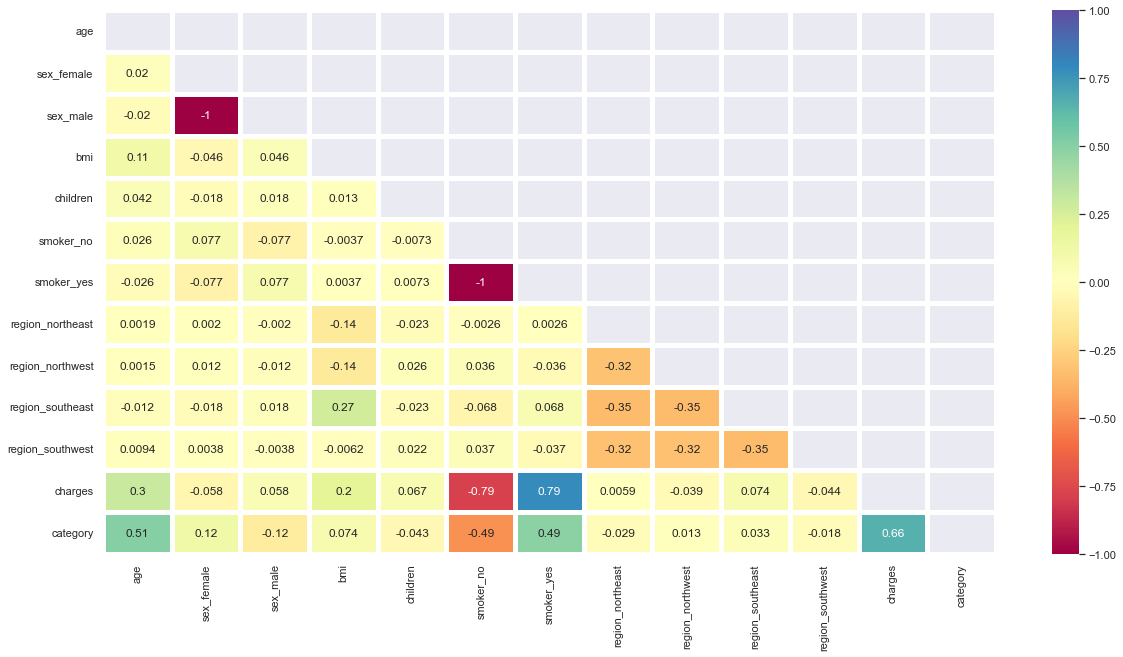

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
correlation_matrix = file.corr()
sns.set(rc={'figure.figsize':(20,10)}) 
mask = np.triu(np.ones_like(correlation_matrix), k=0) 
sns.heatmap(correlation_matrix, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)
pass

## Base models

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

X = file.drop(['charges', 'category'], axis=1)
y = file['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

lnr = LinearRegression()

lnr.fit(X_train, y_train)

y_pred = lnr.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mean_y_pred: {y_pred.mean()}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')

mean_y_pred: 13846.750564444055, RMSE: 5956.342894363585, MAE: 4177.045561036318, R^2: 0.8069287081198013


# Feature creation

In [39]:
file = file.drop(columns=['sex_female', 'smoker_no', 'region_northwest', 'category'])
file

,age,sex_male,bmi,children,smoker_yes,region_northeast,region_southeast,region_southwest,charges
1027,19,0,27.900,0,1,0,0,1,16884.92400
0,18,1,33.770,1,0,0,1,0,1725.55230
123,28,1,33.000,3,0,0,1,0,4449.46200
935,33,1,22.705,0,0,0,0,0,21984.47061
245,32,1,28.880,0,0,0,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1286,50,1,30.970,3,0,0,0,0,10600.54830
526,18,0,31.920,0,0,1,0,0,2205.98080
473,18,0,36.850,0,0,0,1,0,1629.83350
507,21,0,25.800,0,0,0,0,1,2007.94500


1. poniżej 16 - wygłodzenie - cat 0
2. 16 - 16.99 - wychudzenie cat 1
3. 17 - 18.49 - niedowagę - cat 2
4. 18.5 - 24.99 - wagę prawidłową - cat 3
5. 25.0 - 29.9 - nadwagę - cat 4
6. 30.0 - 34.99 - I stopień otyłości - cat 5
7. 35.0 - 39.99 - II stopień otyłości - cat 6
8. powyżej 40.0 - otyłość skrajną - cat 7

In [40]:
# create a list of our conditions
conditions = [
    (file['bmi'] <= 16),
    (file['bmi'] < 17),
    (file['bmi'] < 18.50),
    (file['bmi'] < 25),
    (file['bmi'] < 30),
    (file['bmi'] < 35),
    (file['bmi'] < 40),
    (file['bmi'] >= 40),
    ]

# create a list of the values we want to assign for each condition
values = [0,1,2,3,4,5,6,7]

# create a new column and use np.select to assign values to it using our lists as arguments
file['bmi_cat'] = np.select(conditions, values)

# display updated DataFrame
file.head()

,age,sex_male,bmi,children,smoker_yes,region_northeast,region_southeast,region_southwest,charges,bmi_cat
1027,19,0,27.900,0,1,0,0,1,16884.92400,4
0,18,1,33.770,1,0,0,1,0,1725.55230,5
123,28,1,33.000,3,0,0,1,0,4449.46200,5
935,33,1,22.705,0,0,0,0,0,21984.47061,3
245,32,1,28.880,0,0,0,0,0,3866.85520,4


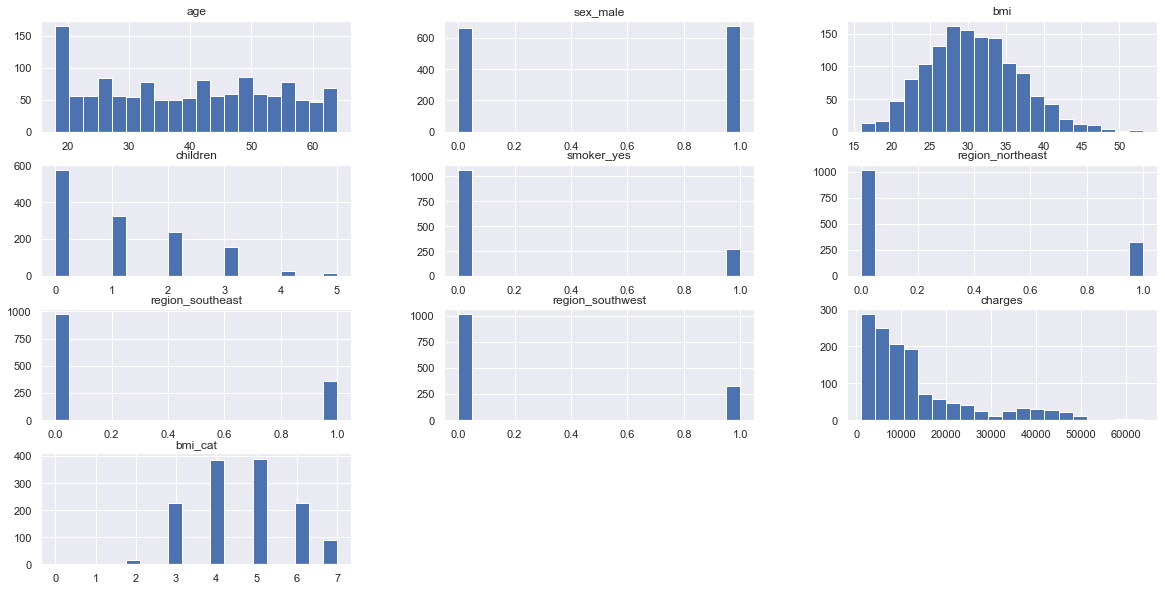

In [41]:
file.hist(bins=20)
pass

In [42]:
skewed_charges = ['charges']

for feat in skewed_charges:
    file['{}_log'.format(feat)] = np.log10(file[feat].values)

file

,age,sex_male,bmi,children,smoker_yes,region_northeast,region_southeast,region_southwest,charges,bmi_cat,charges_log
1027,19,0,27.900,0,1,0,0,1,16884.92400,4,4.227499
0,18,1,33.770,1,0,0,1,0,1725.55230,5,3.236928
123,28,1,33.000,3,0,0,1,0,4449.46200,5,3.648308
935,33,1,22.705,0,0,0,0,0,21984.47061,3,4.342116
245,32,1,28.880,0,0,0,0,0,3866.85520,4,3.587358
...,...,...,...,...,...,...,...,...,...,...,...
1286,50,1,30.970,3,0,0,0,0,10600.54830,5,4.025328
526,18,0,31.920,0,0,1,0,0,2205.98080,5,3.343602
473,18,0,36.850,0,0,0,1,0,1629.83350,6,3.212143
507,21,0,25.800,0,0,0,0,1,2007.94500,4,3.302752


For linear regression firstyl we choose bmi_cat as feature for modeling, secondly bmki itself for comparision

In [43]:
# Let's say we want to split the data in 70:30 for train:valid:test dataset

X = file.drop(columns=['charges_log', 'bmi_cat', 'charges'], axis=1)
# X2 =file_oux.drop(columns=['charges_log', 'bmi', 'charges'], axis=1)

y = file['charges_log']

# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y, train_size=0.7, random_state=42)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)
pass

(935, 8)
(935,)
(402, 8)
(402,)


# Linear regression model creation with charges log

In [44]:
lnr = LinearRegression()

lnr.fit(X_train, y_train)

y_pred = 10**lnr.predict(X_test)
rmse = mean_squared_error(10**y_test, y_pred, squared=False)
mae = mean_absolute_error(10**y_test, y_pred)
r2 = r2_score(10**y_test, y_pred)
print(f'mean_y_pred: {y_pred.mean()}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')

mean_y_pred: 13056.743799045533, RMSE: 7254.922203283578, MAE: 3730.5552134244977, R^2: 0.69241116684553


In [45]:
X.columns

Index(['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northeast',
       'region_southeast', 'region_southwest'],
      dtype='object')

Feature: 0, Score: 0.01482
Feature: 1, Score: 0.03246
Feature: 2, Score: 0.00597
Feature: 3, Score: 0.04098
Feature: 4, Score: 0.66978
Feature: 5, Score: 0.02162
Feature: 6, Score: 0.03420
Feature: 7, Score: 0.02442


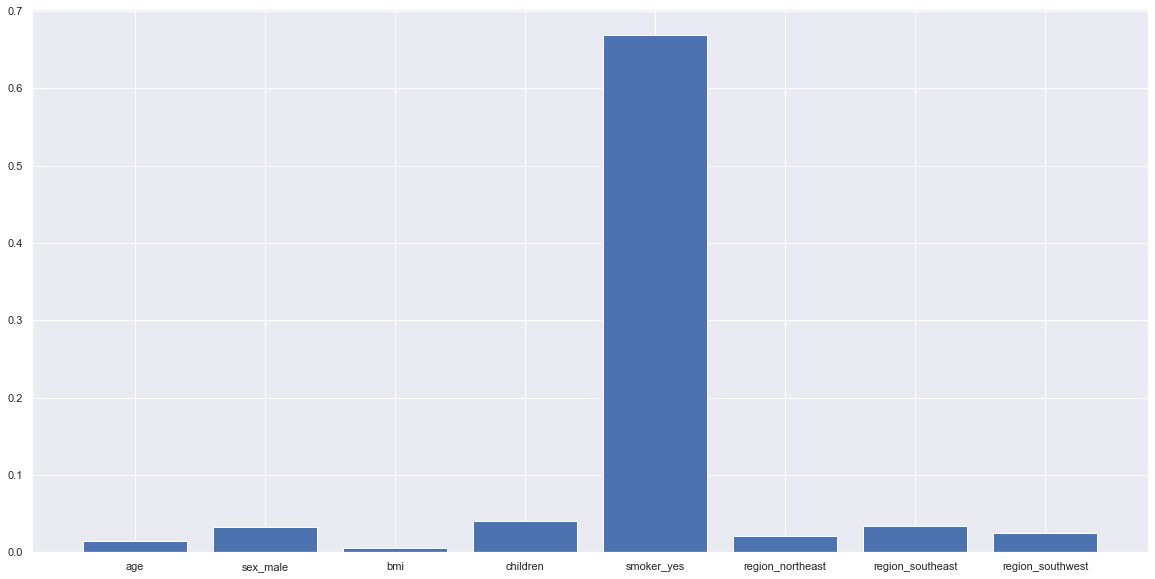

In [46]:
# linear regression feature importance
from matplotlib import pyplot

# get importance
importance = abs(lnr.coef_)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([column for column in X.columns], importance)
pyplot.show()

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_regress_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
random_search = GridSearchCV(poly_regress_pipeline, {'polynomialfeatures__degree': range(1, 10)}, cv=5, verbose=1)
random_search.fit(X_train, y_train)
random_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'polynomialfeatures__degree': 3}

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

best_model  = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X_train, y_train)
y_ = 10**best_model.predict(X_test)

c:\Users\andrz\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


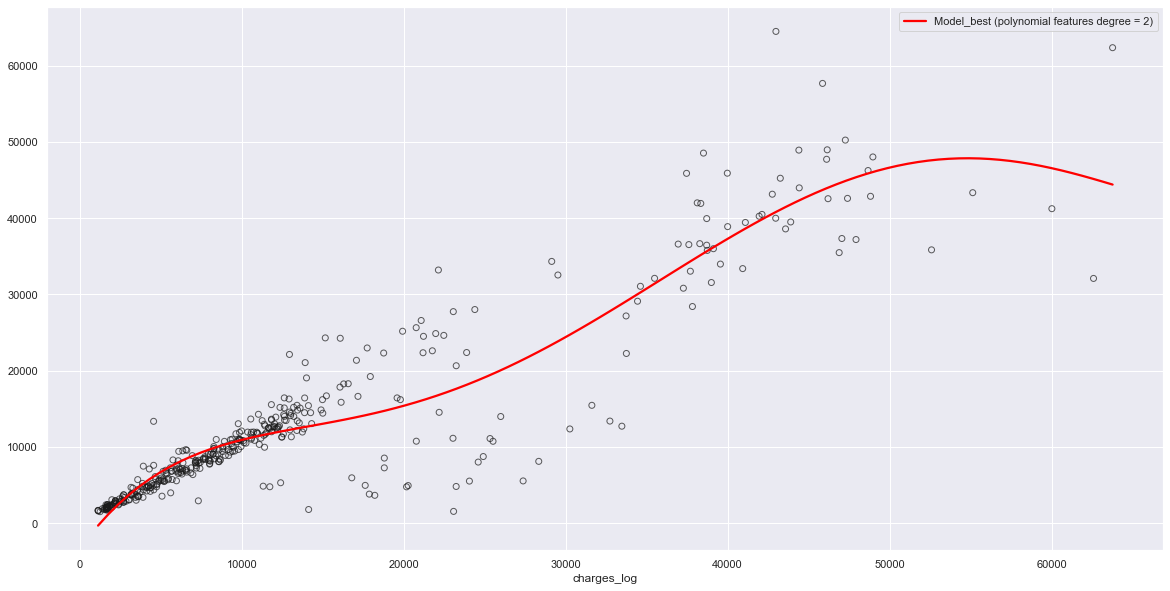

In [49]:
plt.scatter(10**y_test, y_, facecolors='None', edgecolors='k', alpha=.7) 
sns.regplot(10**y_test, y_, ci=None, label='Model_best (polynomial features degree = 2)', order=5, scatter=False, color='red')
plt.legend()

In [50]:

rmse = mean_squared_error(10**y_test, y_, squared=False)
mae = mean_absolute_error(10**y_test, y_)
r2 = r2_score(10**y_test, y_)
print(f'mean_y_pred: {y_.mean()}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')

mean_y_pred: 13211.859915435629, RMSE: 5309.249996026348, MAE: 2777.3618336666505, R^2: 0.8352704940453499


In [51]:
# from math import sqrt
# rmse = sqrt(mean_squared_error(10**y_test, y_im))
# mae = mean_absolute_error(10**y_test, y_im)
# r2 = r2_score(10**y_test, y_im)
# print(f'mean_y_pred: {y_im.mean()}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')

In [61]:
data_y = pd.DataFrame()
data_y['charges_origin'] = pd.DataFrame(10**y_test)
data_y['charges predicted'] = y_
data_y['value 5% of predict'] = 1.05* data_y['charges predicted']
data_y['delta when 5%'] = data_y['value 5% of predict'] - data_y['charges_origin']
data_y['value 10% of predict'] = 1.1* data_y['charges predicted']
data_y['delta when 10%'] = data_y['value 10% of predict'] - data_y['charges_origin']
data_y['value 15% of predict'] = 1.15* data_y['charges predicted']
data_y['delta when 15%'] = data_y['value 15% of predict'] - data_y['charges_origin']
data_y['value 20% of predict'] = 1.20* data_y['charges predicted']
data_y['delta when 20%'] = data_y['value 20% of predict'] - data_y['charges_origin']
data_y


,charges_origin,charges predicted,value 5% of predict,delta when 5%,value 10% of predict,delta when 10%,value 15% of predict,delta when 15%,value 20% of predict,delta when 20%
108,8688.85885,8293.696941,8708.381788,19.522938,9123.066635,434.207785,9537.751482,848.892632,9952.436329,1263.577479
553,5708.86700,5732.010804,6018.611344,309.744344,6305.211884,596.344884,6591.812425,882.945425,6878.412965,1169.545965
1229,11436.73815,12775.713823,13414.499514,1977.761364,14053.285206,2616.547056,14692.070897,3255.332747,15330.856588,3894.118438
790,38746.35510,35775.464929,37564.238175,-1182.116925,39353.011422,606.656322,41141.784668,2395.429568,42930.557915,4184.202815
356,4463.20510,5212.520876,5473.146920,1009.941820,5733.772964,1270.567864,5994.399008,1531.193908,6255.025052,1791.819952
...,...,...,...,...,...,...,...,...,...,...
598,5148.55260,6803.828630,7144.020061,1995.467461,7484.211493,2335.658893,7824.402924,2675.850324,8164.594356,3016.041756
1235,11363.28320,11521.739108,12097.826063,734.542863,12673.913018,1310.629818,13249.999974,1886.716774,13826.086929,2462.803729
1286,10600.54830,11175.996788,11734.796627,1134.248327,12293.596467,1693.048167,12852.396306,2251.848006,13411.196145,2810.647845
1110,13429.03540,13421.958898,14093.056843,664.021443,14764.154788,1335.119388,15435.252733,2006.217333,16106.350677,2677.315277


In [62]:
sum_delta = pd.DataFrame()
sum_delta.at[0,'origin'] = data_y['charges_origin'].sum()
sum_delta.at[0,'delta when 5%'] = data_y['delta when 5%'].sum()
sum_delta.at[0,'delta when 10%'] = data_y['delta when 10%'].sum()
sum_delta.at[0,'delta when 15%'] = data_y['delta when 15%'].sum()
sum_delta.at[0,'delta when 20%'] = data_y['delta when 20%'].sum()
sum_delta

,origin,delta when 5%,delta when 10%,delta when 15%,delta when 20%
0,5.566399e+06,10327.157076,275885.541377,541443.925677,807002.309977


In [54]:
data_y['charges_origin'].sum()

5566398.913229001

In [55]:
# data_y['delta abs %'].describe()

In [56]:
def model_summary(y_test,y_pred,title="Title"):
    sns.set(rc={'figure.figsize':(10,10)})
    max1 = int(y_pred.max())
    max2 = int(y_test.max())
    # m = np.min(max1,max2)
    plt.scatter(y_test,y_pred)
    plt.xlabel("test values")
    plt.ylabel("prediceted values")
    # plt.plot([0,m],[0,m],'r--')
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    plt.title(str(title).upper(), font={'size':16})
    t1, t2, t3, t4 = "Mean:", "RMSE:", "MAE:", "R^2:"
    s1, s2, s3, s4 = format(y_pred.mean(),'.3f'), format(rmse,'.3f'), format(mae,'.3f'), format(r2,'.3f')
    plt.annotate(f"{t1} {s1:>10} \n{t2} {s2:>10} \n{t3} {s3:>11} \n{t4} {s4:>11}", [0,max1*.9],
                    font={'size':13, 'family':'courier new', 'weight':'bold'},
                    bbox={'facecolor': 'white', 'edgecolor' : 'black', 'alpha': 0.5, 'pad': 10})



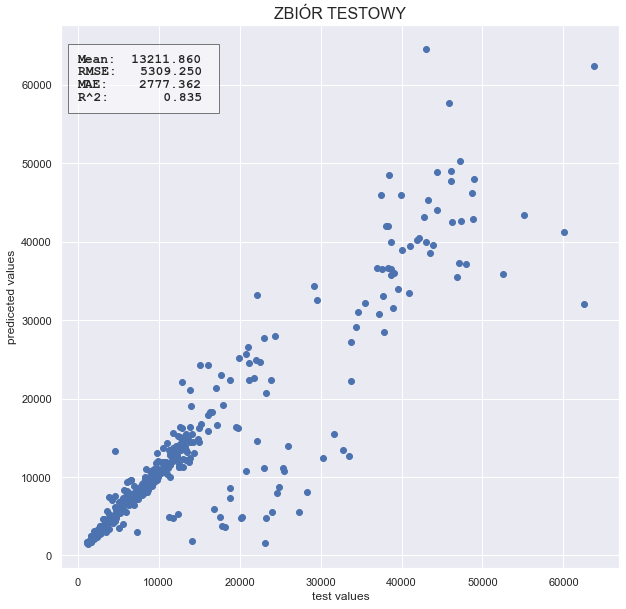

In [57]:
model_summary(10**y_test,y_, title='Zbiór testowy')

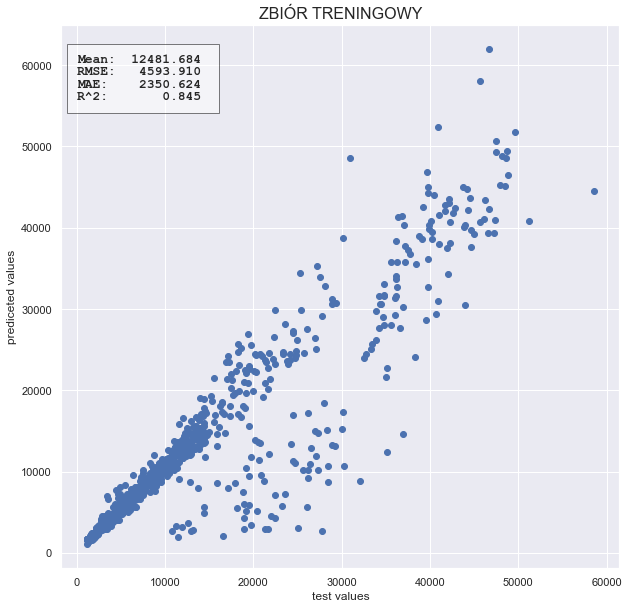

In [58]:
model_summary(10**y_train,10**best_model.predict(X_train), title='Zbiór treningowy')